In [ ]:
#Manual Review - Data Cleaning

"""
Many records are incorrect, and inspecting independant sources, our files have corrupted syntax or missing record data.
"""

#Name field:
"""
22 Records have their names mis-represented. Repaired:

Assaf Khalil, Mrs. Mariana ("Miriam")
Johnston, Mrs. Andrew G (Elizabeth "Lily" Watson)
Katavelas, Mr. Vassilios ("Catavelas Vassilios")
Coutts, Mrs. William (Winnie "Minnie" Treanor)
Hocking, Miss. Ellen "Nellie"
Thomas, Mrs. Alexander (Thamine "Thelma")
Willer, Mr. Aaron ("Abi Weller")
Lindeberg-Lind, Mr. Erik Gustaf ("Mr Edward Lingrey")
Moubarek, Mrs. George (Omine "Amenia" Alexander)
Johnston, Master. William Arthur "Willie"
Khalil, Mrs. Betros (Zahie "Maria" Elias)
Wells, Mrs. Arthur Henry ("Addie" Dart Trevaskis)
Daly, Miss. Margaret Marcella "Maggie"
McCarthy, Miss. Catherine "Katie"
Rosenshine, Mr. George ("Mr George Thorne")
Nakid, Mrs. Said (Waika "Mary" Mowad)
Dean, Miss. Elizabeth Gladys "Millvina"
Riihivouri, Miss. Susanna Juhantytar "Sanni"
Cotterill, Mr. Henry "Harry"
Wheeler, Mr. Edwin "Frederick"
Nourney, Mr. Alfred ("Baron von Drachstedt")
Riordan, Miss. Johanna "Hannah"

*Discovered via V-Lookup on name based cells


2 Duplicate names found, and handled, they are different people with the same name

Kelly, Mr. James
Connolly, Miss. Kate

*Discovered via pivoting/aggregating on name to see any duplicates arise, and analysing the unique identifiers such as the ticket ID to make clear if its a real duplicate or a different person


"""

#PassengerId

"""
Looks like a newly made identifier, as it does not exist on the original dataset, remapped and checked integrity across the dataset.
"""

#Survived

"""
Fixed 418 rows of missing data from core dataset
"""

#pclass & sex

"""
No errors found


Enumerated Sex:

    Male : 0
    Female : 1

"""

#age

"""
263 rows missing age range.

- Attempt to fill age gaps with averages
-- Assess any nuances in the average
--- Identified "Master" category, which covers boys under 18
--- Identified "Misses" category, which covers young and unmarried girls 0-80
"""

"""
8 Rows with missing ages, noted with "master" (denotes males under the age of 18)

Betros, Master. Seman
Johnston, Master. William Arthur "Willie"
Lefebre, Master. Henry Forbes
Moubarek, Master. Gerios
Moubarek, Master. Halim Gonios ("William George")
Peter, Master. Michael J
Sage, Master. Thomas Henry
van Billiard, Master. James William

Average of "Master" rows was 5.5, replaced NULL entries with 5.5

Created new column: age_rnd

Contains "floor" rounded ages, to isolate as integers.
"""

"""
50 Rows with missing ages, noted with "miss" (young and unmarried girls 0-80)

Rows marked in Orange: https://docs.google.com/spreadsheets/d/1d_1vZmIAUHujI0_RUkYK4SnKLmF5w3StPJK3HMB0M18/edit?usp=sharing

Average of "miss" rows was 21.7, replaced NULL entries with 21.7
"""

"""
205 Rows with missing ages

205 Rows labeled red: https://docs.google.com/spreadsheets/d/1d_1vZmIAUHujI0_RUkYK4SnKLmF5w3StPJK3HMB0M18/edit?usp=sharing

Average of rows: 33.7, replaced NULL entries with 33.7

"""

#fare

"""
1 Row with missing values

Isolating correlated subset of data to average against:

- Filtered pclass 3 only
- No home destination listed
- Embarked from destination S
- Siblings and Parch reviewed, but no correlating factors noted

Resulting list of 495 travellers, and the average ticket cost was 13

Inserted average into empty row: Storey, Mr. Thomas

"""

#Embarked

"""
2 Rows with missing embarked
Icard, Miss. Amelie
Stone, Mrs. George Nelson (Martha Evelyn)

Reviewing correlated factors, such as ticketing price, destinations and other ticket holders, the closely related Embarked.

Replaced values with S, since both rows are related and have high probability of going to the same destination

"""


In [5]:
#Begin large tests to review missing data / issues that cannot be managed manually due to timeconstraints

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mn
%matplotlib inline


#data = pd.read_csv('titanic_cleaned.csv')
#data.head()

,PassengerId,name,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,584,"Ross, Mr. John Hugo",1,0,0,36.0,0,0,13049,40.1250,A10,C,NaN,NaN,"Winnipeg, MB"
1,1100,"Rosenbaum, Miss. Edith Louise",1,1,1,33.0,0,0,PC 17613,27.7208,A11,C,11,NaN,"Paris, France"
2,476,"Clifford, Mr. George Quincy",1,0,0,33.7,0,0,110465,52.0000,A14,S,NaN,NaN,"Stoughton, MA"
3,557,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",1,1,1,48.0,1,0,11755,39.6000,A16,C,1,NaN,London / Paris
4,1223,"Dulles, Mr. William Crothers",1,0,0,39.0,0,0,PC 17580,29.7000,A18,C,NaN,133.0,"Philadelphia, PA"


In [6]:
#data.isnull().sum()

PassengerId       0
name              0
pclass            0
survived          0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin          1014
embarked          0
boat            823
body           1188
home.dest       564
dtype: int64

<Axes: >

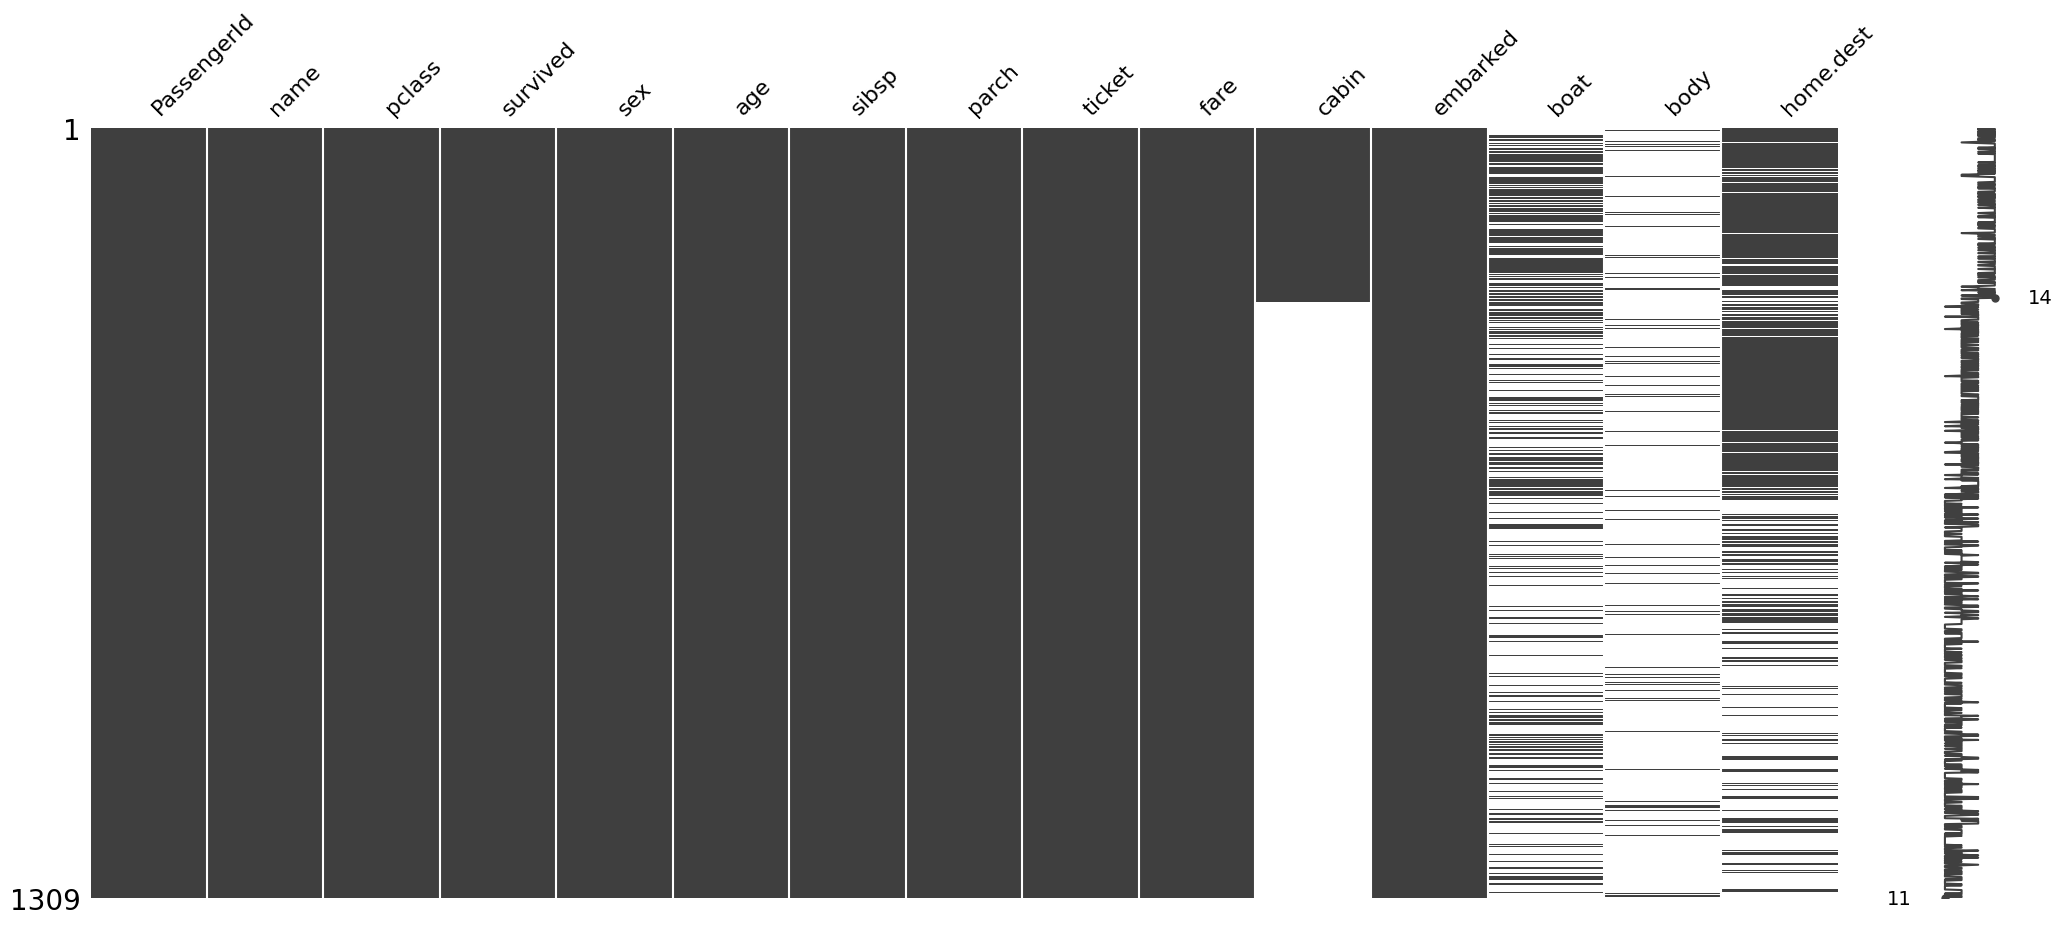

In [7]:
#mn.matrix(data)

In [9]:
#data['cabin'].unique()

array(['A10', 'A11', 'A14', 'A16', 'A18', 'A19', 'A20', 'A21', 'A23',
       'A24', 'A26', 'A29', 'A31', 'A32', 'A34', 'A36', 'A5', 'A6', 'A7',
       'A9', 'B10', 'B101', 'B102', 'B11', 'B18', 'B19', 'B20', 'B22',
       'B24', 'B26', 'B28', 'B3', 'B30', 'B35', 'B36', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B45', 'B49', 'B5', 'B50',
       'B51 B53 B55', 'B52 B54 B56', 'B57 B59 B63 B66', 'B58 B60', 'B61',
       'B69', 'B71', 'B73', 'B77', 'B78', 'B79', 'B80', 'B82 B84', 'B86',
       'B94', 'B96 B98', 'C101', 'C103', 'C104', 'C105', 'C106', 'C110',
       'C111', 'C116', 'C118', 'C123', 'C124', 'C125', 'C126', 'C128',
       'C130', 'C132', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C28',
       'C30', 'C31', 'C32', 'C39', 'C45', 'C46', 'C47', 'C49', 'C50',
       'C51', 'C52', 'C53', 'C54', 'C55 C57', 'C6', 'C62 C64', 'C65',
       'C68', 'C7', 'C70', 'C78', 'C80', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C89', 'C90', 'C91', 'C92', 'C93', 'C95', 'C97', 'C99', 'D',
       'D

In [13]:
#most_freq_cate = data['cabin'].value_counts().index[0]
#data['cabin_freq_cate'] = data['cabin'].fillna(most_freq_cate)

In [15]:
#mode= data['cabin'].mode()[0]
#data['cabin_mode'] = data['cabin'].fillna(mode)

In [16]:
#new_cate = ' Unknown'
#data['cabin_new_feature'] = data['cabin'].fillna(new_cate)

<Axes: >

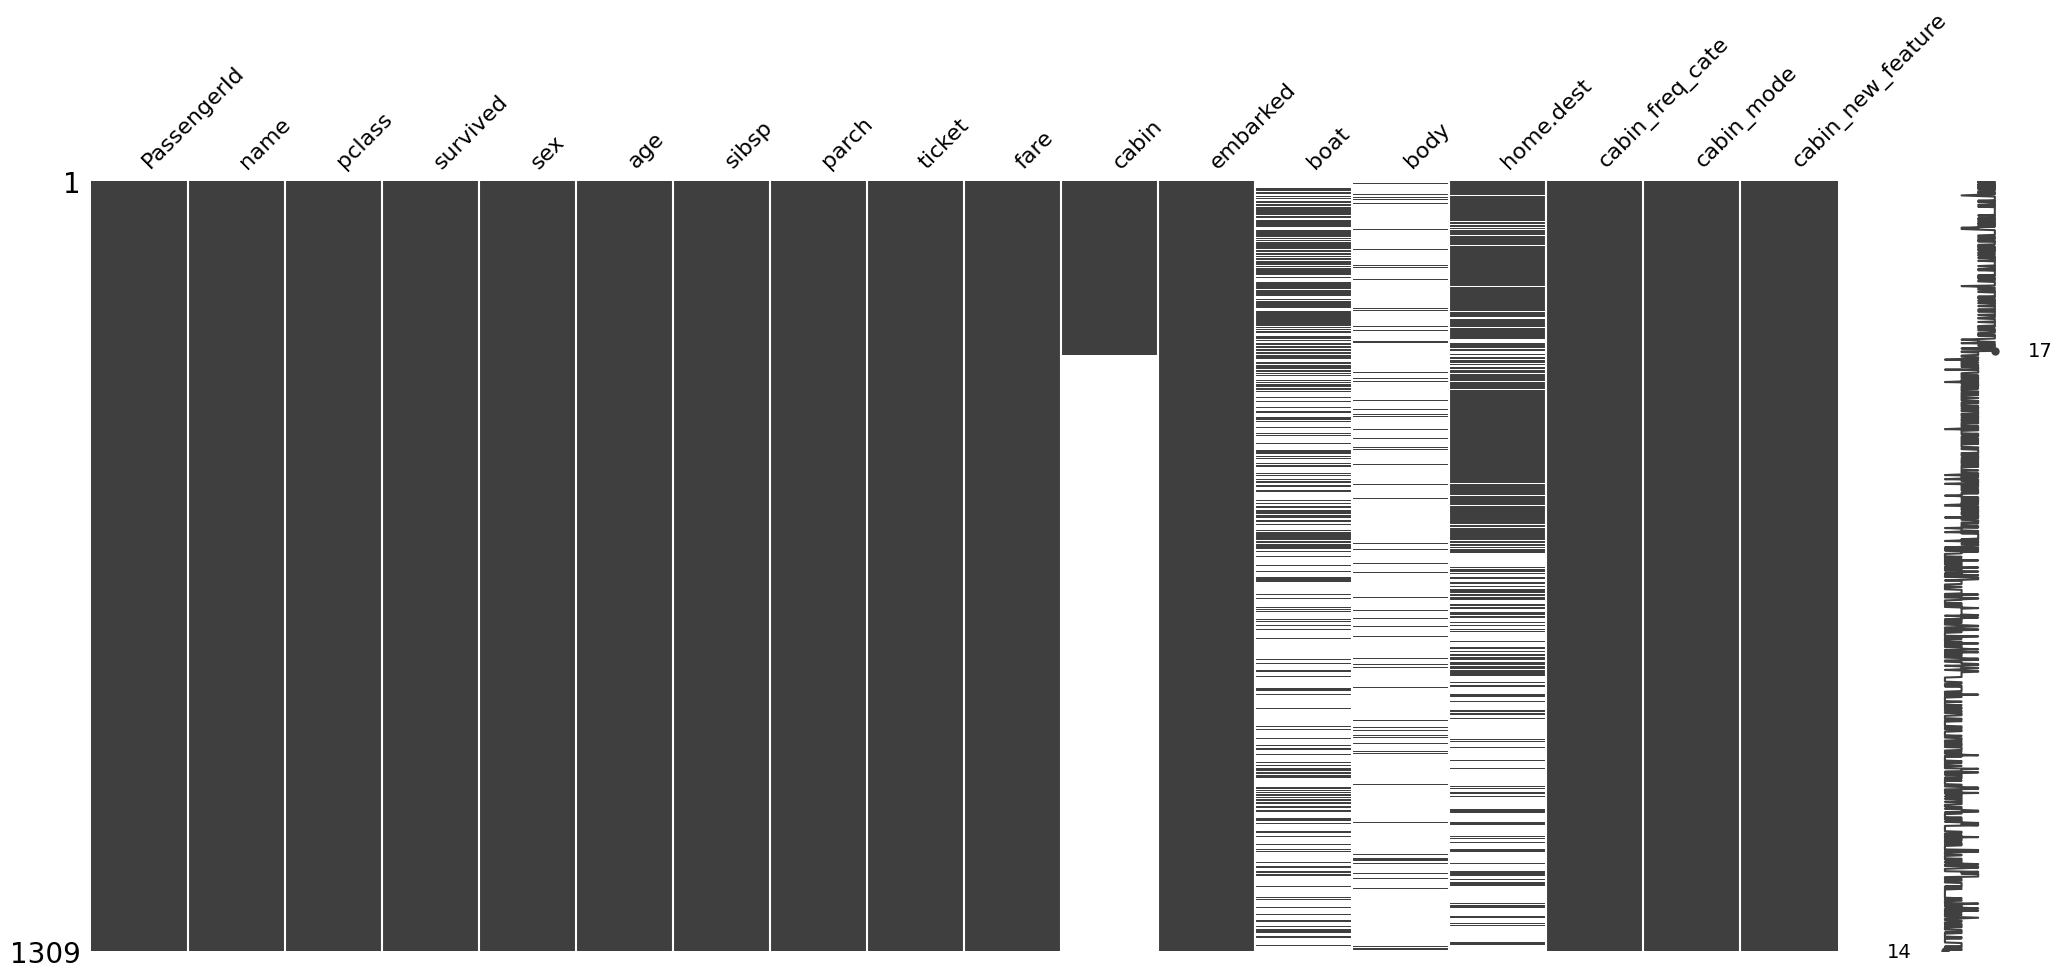

In [18]:
#mn.matrix(data)

In [19]:
#data.to_csv('Titanic_Clean_Cabin_Data.csv')

#Complete failure, the mode returns the most occurring cabin, and there are many proportional issues with the cabin placement and distribution to be handled. Try again!

In [20]:
data = pd.read_csv('titanic_cleaned.csv')
data.head()

#Additional Cleaning attempts

"""
Decks - Added new column:

There were 10 decks in total. From top to bottom they were the Boat Deck, the Promenade Deck (deck A), passenger decks B to G, Orlop Deck, and the Tank Top.

T = 0
A = 1
B  = 2
C  = 3
D  = 4
E  = 5
F   = 6
G  = 7

Location - Added new column:

Front = 0
Middle = 1
End = 2

embarked - Reformatted to numerical

Port of Embarkation (

0 = C = Cherbourg; 
1 = Q = Queenstown; 
2 = S = Southampton)

"""



,name,PassengerId,pclass,survived,sex,age,age_rnd,sibsp,parch,ticket,fare,cabin,Decks,Location,embarked,boat,body,home.dest
0,"Ross, Mr. John Hugo",584,1,0,0,36.0,36,0,0,13049,40.1250,A10,1,0,0,NaN,NaN,"Winnipeg, MB"
1,"Rosenbaum, Miss. Edith Louise",1100,1,1,1,33.0,33,0,0,PC 17613,27.7208,A11,1,0,0,11,NaN,"Paris, France"
2,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",557,1,1,1,48.0,48,1,0,11755,39.6000,A16,1,0,0,1,NaN,London / Paris
3,"Brewe, Dr. Arthur Jackson",767,1,0,0,33.7,33,0,0,112379,39.6000,A16,1,0,0,NaN,NaN,"Philadelphia, PA"
4,"Dulles, Mr. William Crothers",1223,1,0,0,39.0,39,0,0,PC 17580,29.7000,A18,1,0,0,NaN,133.0,"Philadelphia, PA"


<Axes: >

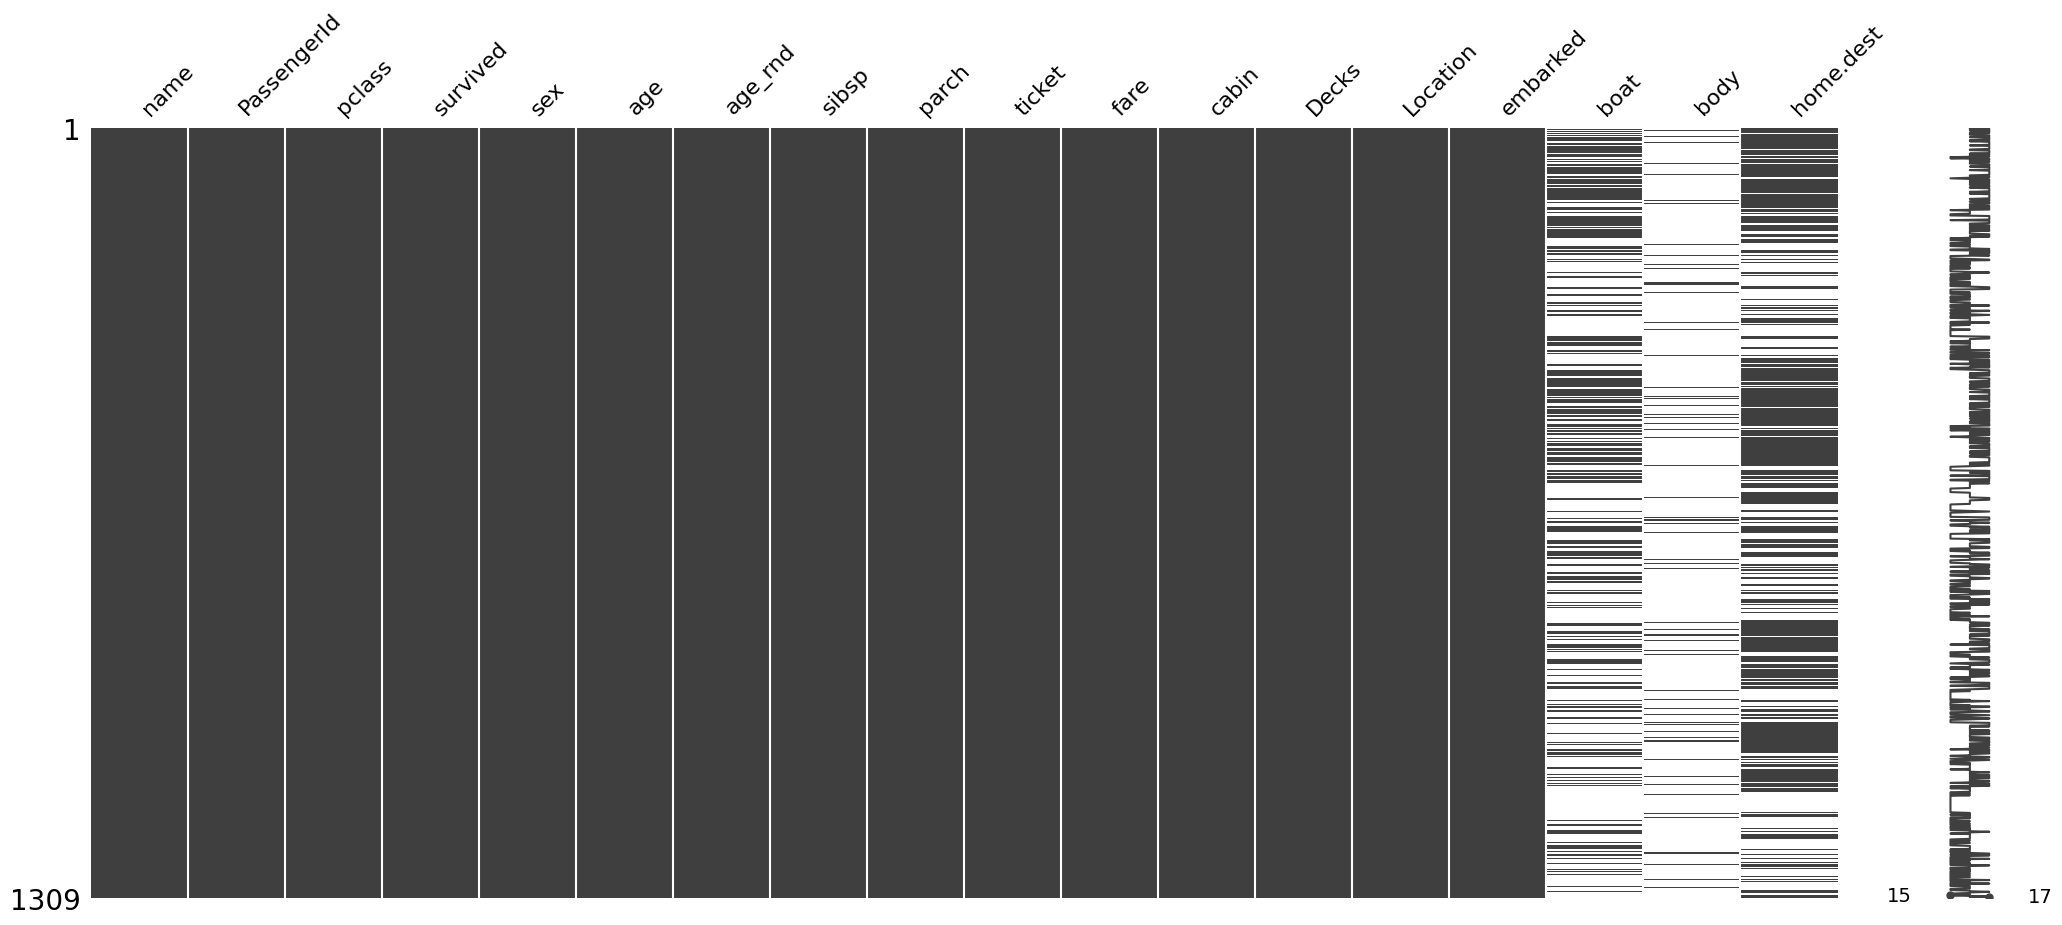

In [21]:
mn.matrix(data)

In [22]:
#Boat, body are data points related to survival, so those columns are ignored. And it's impossible to guess relevant home destinations, so any further analysis will be done with dummy data if its used.

#Cabin: Aligned cabins against multiple variables, such as cabin availability across decks, max space per area, and cabin, and possibility of consequetive use of rooms on a single voyage. In addition weighting of the rooms was measured against the 
# class of the passenger, and their ticket price, as well as linking cabins tied to family members or those appearing to be on the same journey.
# Obviously the specific rooms stayed in are unknown, but the ratio of passengers in each cabin section seems to align with expectations.
# Note cabin bias to the front of the boat, it looks to be a sewer system at the back of the boat, which would lead assumption that no high class cabins are situated in that area, and have less space for general cabins.
# The T deck seems to be only for a single person
# Fares of '0' were assumed to be either Royalty/VIP or employees, or were travelling free for some reason and thus was weighted towards higher class or working class cabins
# Locations are noted based on cabin number, with 0-49 being the front, 50-99 being the middle and 100+ being at the end of the boat. Measuring the distribution across the locations seems to be balanced, considering the majority of the end of the boat was left for machinery and unlivable areas.